<a href="https://colab.research.google.com/github/Harsh-Yadav73/Image-Enhancement/blob/main/IE8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MOUNTING THE GOOGLE DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# REGION BASED SEGMENTATION

**Region-based segmentation divides an image into regions based on predefined criteria. This can include methods like region growing, where adjacent pixels are grouped based on similar properties, and watershed segmentation, which treats the image like a topographic map**

ORIGINAL IMAGE


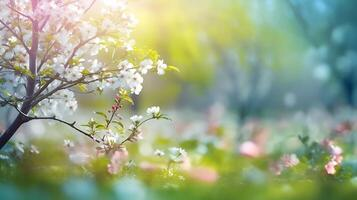

GRAY IMAGE


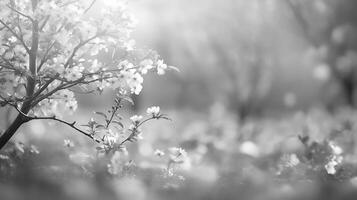

THRESHOLD IMAGE


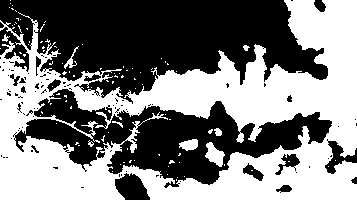

NameError: name 'a' is not defined

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/natureimage.jpg")
print("ORIGINAL IMAGE")
cv2_imshow(image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print("GRAY IMAGE")
cv2_imshow(gray)

ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
print("THRESHOLD IMAGE")
cv2_imshow(thresh)
a
kernel = np.ones((3, 3), np.uint8)

opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

sure_bg = cv2.dilate(opening, kernel, iterations=3)

dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 3)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)

unknown = cv2.subtract(sure_bg, sure_fg)

ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

cv2.watershed(image, markers)

image[markers == -1] = [0, 0, 255]

print("REGION BASED SEGMENTATION IMAGE")
cv2_imshow(image)


# IMAGE COMPREHENSION

*LOSSY COMPRESSION*

**Lossy compression reduces the size of an image file by permanently eliminating certain information, especially redundant data. Techniques like JPEG compression are used to significantly reduce file size at the cost of some loss in quality.**

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
image=cv2.imread("/content/drive/MyDrive/Colab Notebooks/natureimage.jpg")
print("ORGINAL IMAGE")
cv2_imshow(image)
cv2.imwrite("compressed.jpg",image,[cv2.IMWRITE_JPEG_QUALITY,50])
compressed=cv2.imread("compressed.jpg")
print("COMPRESSED IMAGE")
cv2_imshow(compressed)









*Lossless Comprehension*

**Lossless compression reduces the image file size without any loss of quality. Methods such as PNG compression ensure that all original data can be perfectly reconstructed from the compressed file.**

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
image=cv2.imread("/content/drive/MyDrive/Colab Notebooks/natureimage.jpg")
print("ORGINAL IMAGE")
cv2_imshow(image)
cv2.imwrite("compressed.jpg",image,[cv2.IMWRITE_JPEG_QUALITY,0])
compressed=cv2.imread("compressed.jpg")
print("COMPRESSED IMAGE")
cv2_imshow(compressed)